# Prac 08.1

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/tmp/ipython-input-2401666654.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


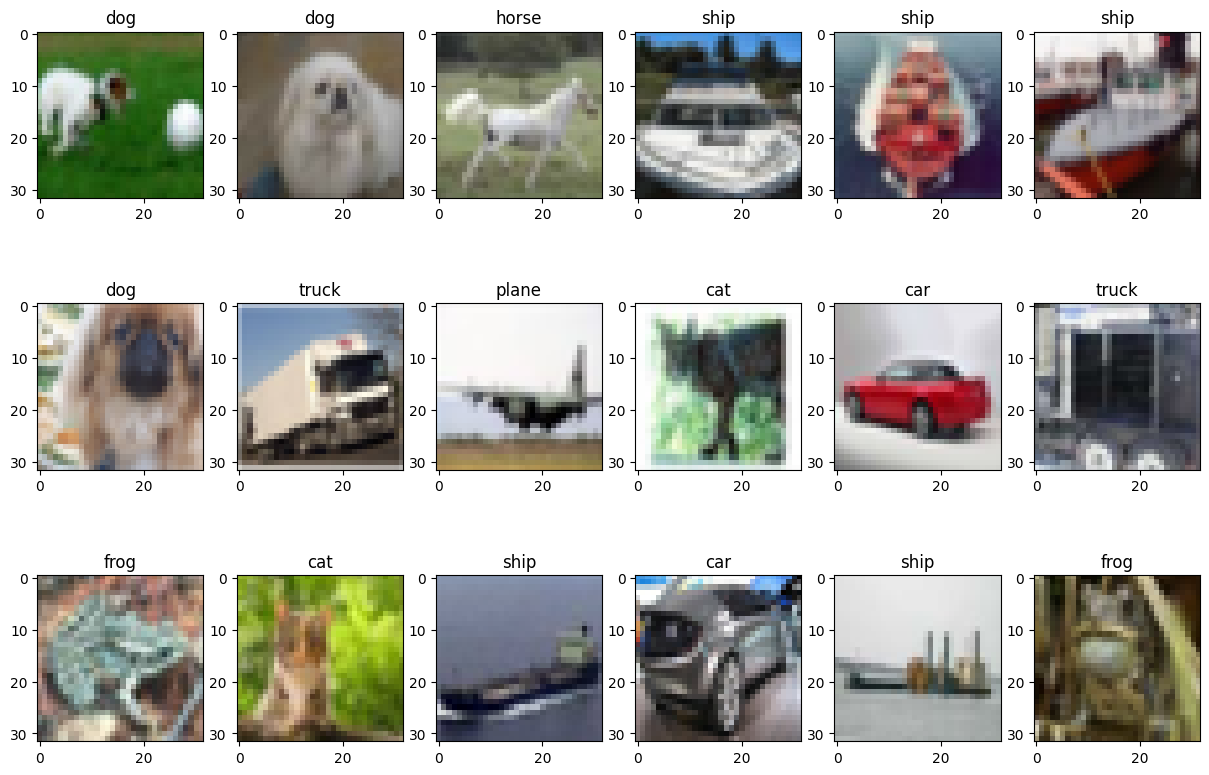

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [ ]:
# Compute the class histogram
from collections import Counter

hist = Counter(y_train.flatten())
print(hist)

Counter({np.uint8(6): 5000, np.uint8(9): 5000, np.uint8(4): 5000, np.uint8(1): 5000, np.uint8(2): 5000, np.uint8(7): 5000, np.uint8(8): 5000, np.uint8(3): 5000, np.uint8(5): 5000, np.uint8(0): 5000})


### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [ ]:
# Normalization
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [ ]:
# Build the classifier
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [ ]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 303ms/step - accuracy: 0.3280 - loss: 1.8235 - val_accuracy: 0.5413 - val_loss: 1.2983
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - accuracy: 0.5645 - loss: 1.2341 - val_accuracy: 0.6202 - val_loss: 1.0970
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 309ms/step - accuracy: 0.6431 - loss: 1.0265 - val_accuracy: 0.6731 - val_loss: 0.9501
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 298ms/step - accuracy: 0.6872 - loss: 0.9050 - val_accuracy: 0.7026 - val_loss: 0.8682
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 312ms/step - accuracy: 0.7200 - loss: 0.8039 - val_accuracy: 0.7158 - val_loss: 0.8409
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 317ms/step - accuracy: 0.7485 - loss: 0.7293 - val_accuracy: 0.7103 - val_loss: 0.8602
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 305ms/step - accuracy: 0.7713 - loss: 0.6712 - val_accuracy: 0.7254 - val_loss: 0.8231
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.7873 - los

Train Acc      0.944474995136261
Validation Acc 0.7135999798774719


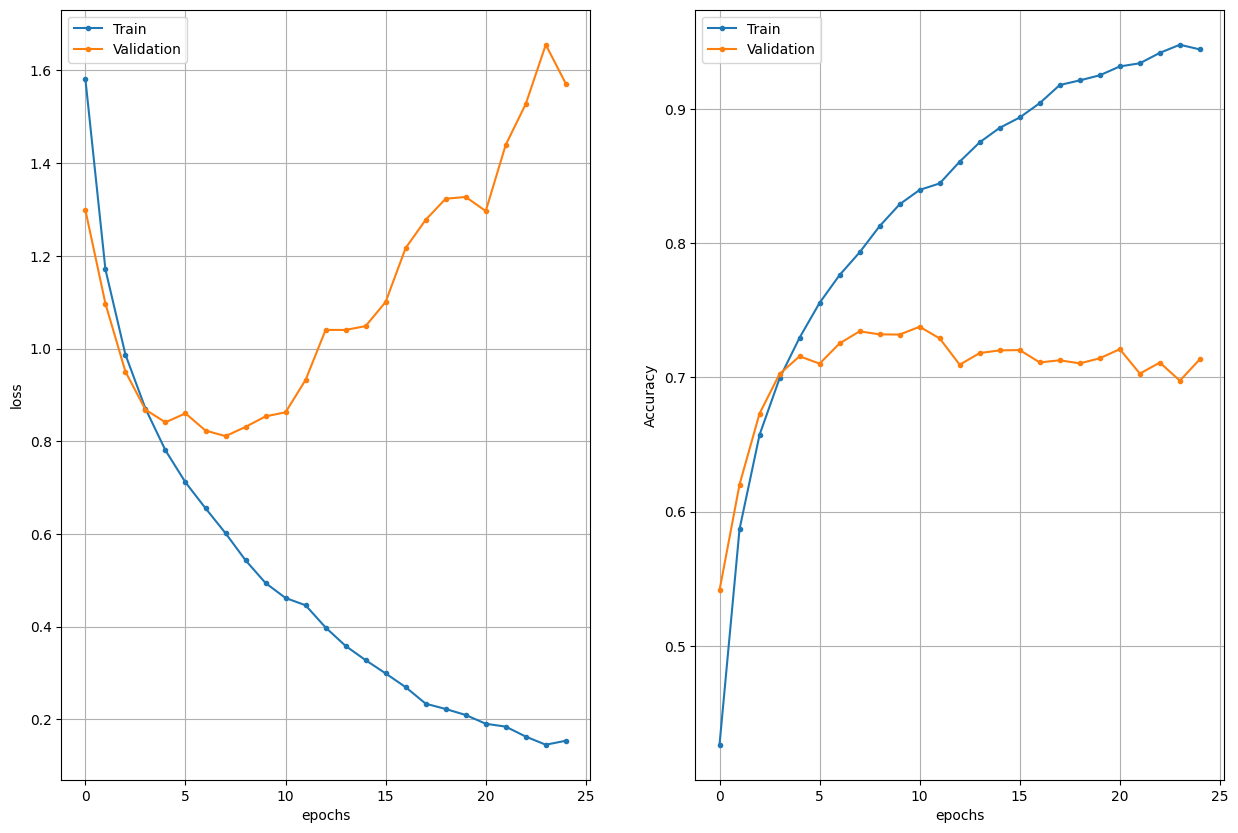

In [ ]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [ ]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [ ]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = (y_true == class_id)
    acc = np.mean(y_pred[mask] == y_true[mask])
    print(class_name, acc)

plane 0.731
car 0.852
bird 0.691
cat 0.46
deer 0.629
dog 0.525
frog 0.809
horse 0.793
ship 0.832
truck 0.741


In [ ]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7088 - loss: 1.5724
Test loss   1.5931857824325562
Test metric 0.7063000202178955


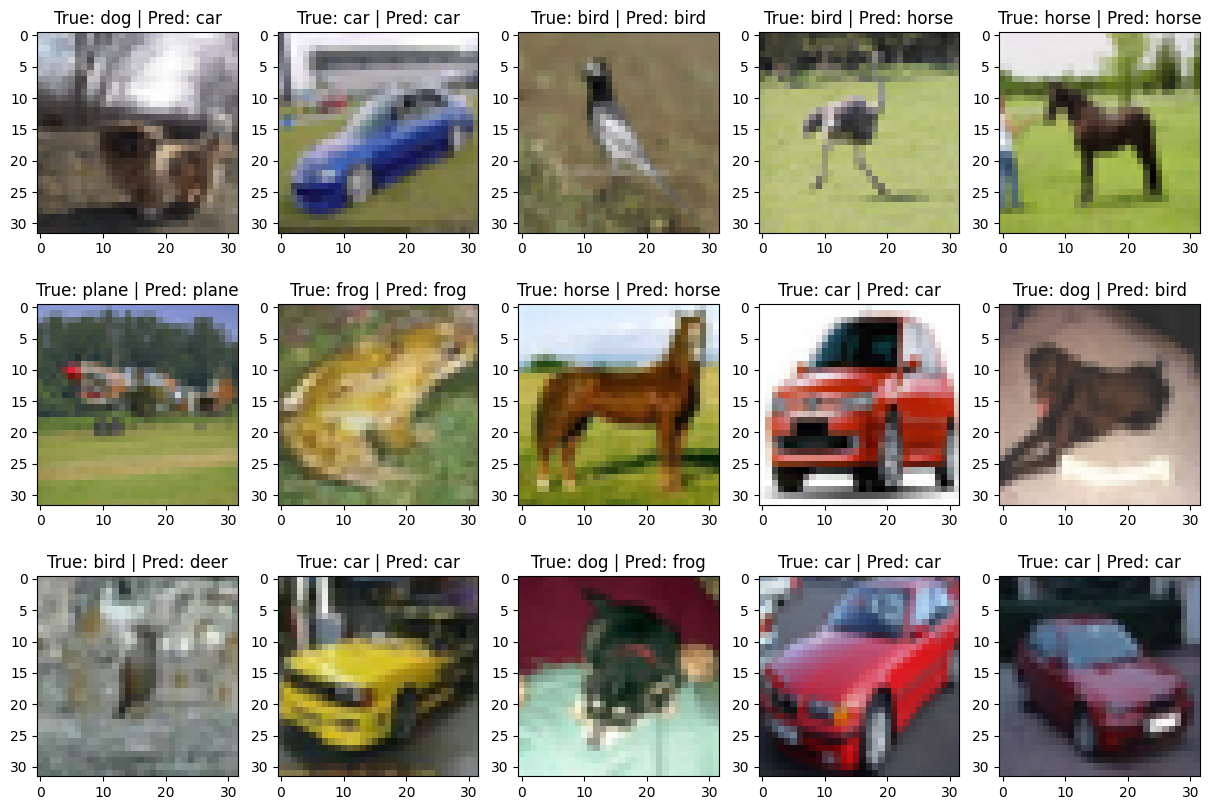

In [ ]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) +
              ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
The average accuracy for all classes is approximately 0.71.
* What modifications would you do in order to improve the classification accuracy?
- Add BatchNormalization after convolution layers.
- Add Dropout to reduce overfitting.
- Use more convolution layers.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model

# Improved CNN
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_bn = Model(inputs, outputs)
model_bn.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model_bn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
epochs = 25
batch_size = 128

history_bn = model_bn.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 418ms/step - accuracy: 0.4722 - loss: 1.5222 - val_accuracy: 0.2010 - val_loss: 2.5205
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 402ms/step - accuracy: 0.6847 - loss: 0.9030 - val_accuracy: 0.6357 - val_loss: 1.0419
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 402ms/step - accuracy: 0.7551 - loss: 0.7077 - val_accuracy: 0.6879 - val_loss: 0.9179
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 415ms/step - accuracy: 0.8091 - loss: 0.5544 - val_accuracy: 0.5536 - val_loss: 1.5074
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.8496 - loss: 0.4454 - val_accuracy: 0.6033 - val_loss: 1.3540
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 398ms/step - accuracy: 0.8842 - loss: 0.3481 - val_accuracy: 0.5245 - val_loss: 2.0490
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 401ms/step - accuracy: 0.9137 - loss: 0.2661 - val_accuracy: 0.6780 - val_loss: 1.2280
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 401ms/step - accuracy: 0.9280 -

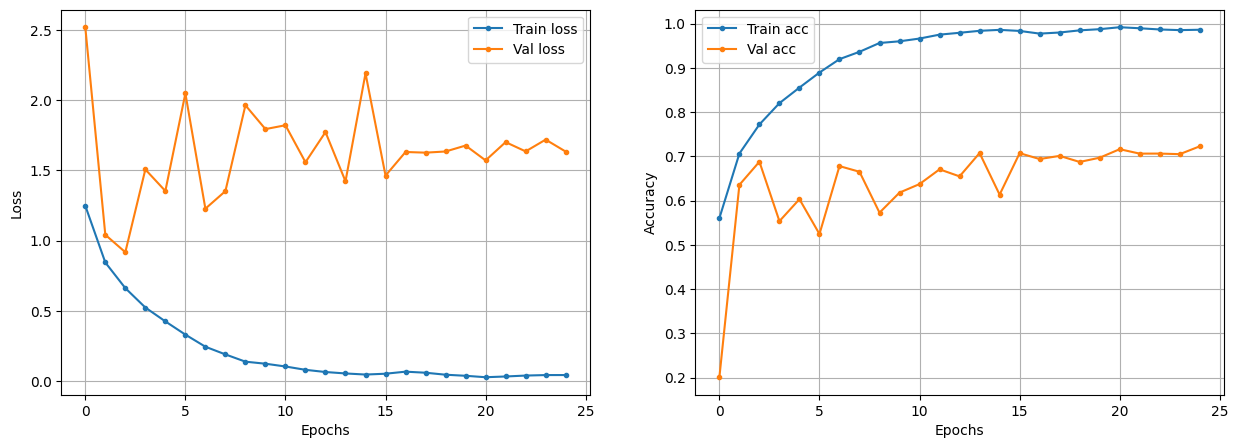

Final Train Acc: 0.9861000180244446
Final Val Acc:   0.7226999998092651


In [ ]:
h = history_bn.history
ep = range(len(h['loss']))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(ep, h['loss'], '.-', label='Train loss')
plt.plot(ep, h['val_loss'], '.-', label='Val loss')
plt.legend(); plt.grid(True); plt.xlabel("Epochs"); plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(ep, h['accuracy'], '.-', label='Train acc')
plt.plot(ep, h['val_accuracy'], '.-', label='Val acc')
plt.legend(); plt.grid(True); plt.xlabel("Epochs"); plt.ylabel("Accuracy")

plt.show()

print("Final Train Acc:", h['accuracy'][-1])
print("Final Val Acc:  ", h['val_accuracy'][-1])

In [ ]:
# Convert one-hot labels back to integers
y_true = np.argmax(y_test, axis=1)

# Predictions
y_pred = np.argmax(model_bn.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [ ]:
for class_id, class_name in classes.items():
    mask = (y_true == class_id)
    acc = np.mean(y_pred[mask] == y_true[mask])
    print(f"{class_name:6s}  accuracy: {acc:.4f}")

plane   accuracy: 0.7430
car     accuracy: 0.8770
bird    accuracy: 0.6570
cat     accuracy: 0.5110
deer    accuracy: 0.7120
dog     accuracy: 0.5900
frog    accuracy: 0.7700
horse   accuracy: 0.6760
ship    accuracy: 0.8500
truck   accuracy: 0.7770


In [ ]:
test_loss, test_acc = model_bn.evaluate(x_test, y_test)
print("Test loss :", test_loss)
print("Test acc  :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7178 - loss: 1.6540
Test loss : 1.6535998582839966
Test acc  : 0.7163000106811523


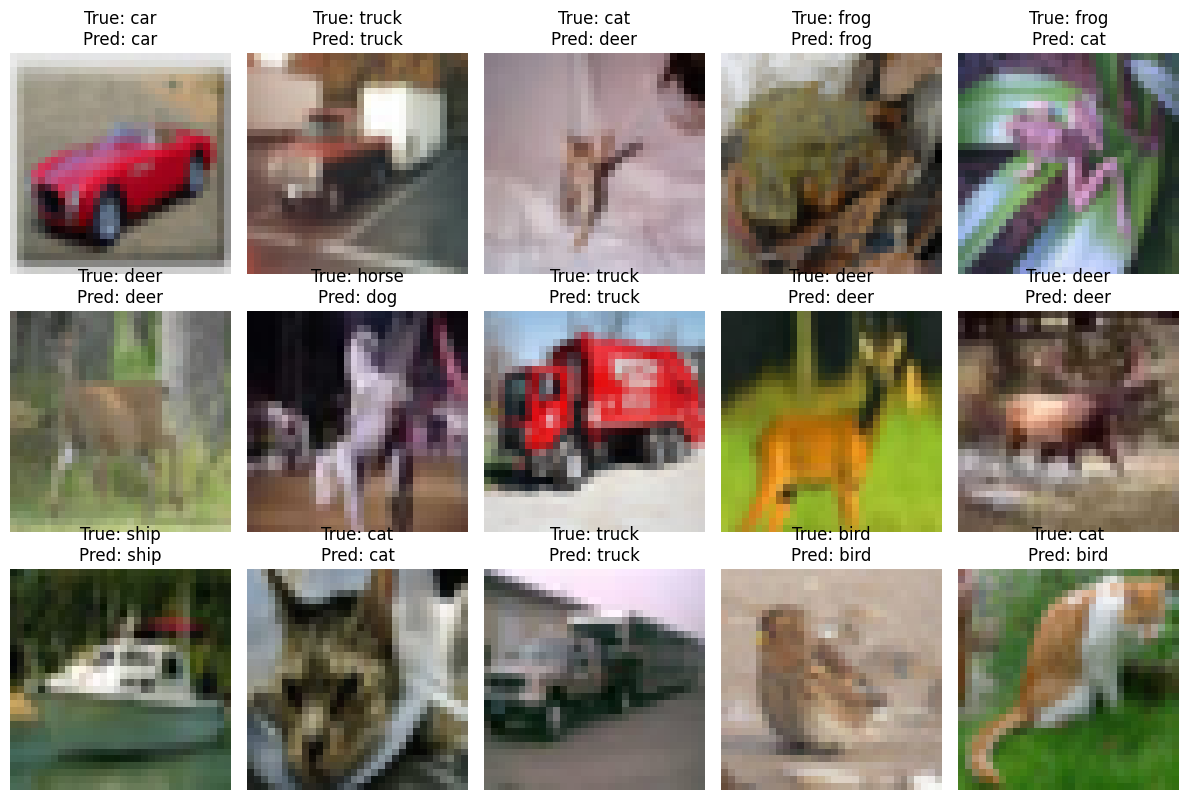

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(15):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {classes[y_true[idx]]}\nPred: {classes[y_pred[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()